In [1]:
import numpy as np
import llcf_test
from scipy.spatial import cKDTree
from matplotlib import pyplot as plt

In [2]:
np.random.seed(0)

# Linear function without noise
n = 1000

X = np.random.normal(size=(n,1))
Y = 4*X + 3

## Visualizing the effects of noise

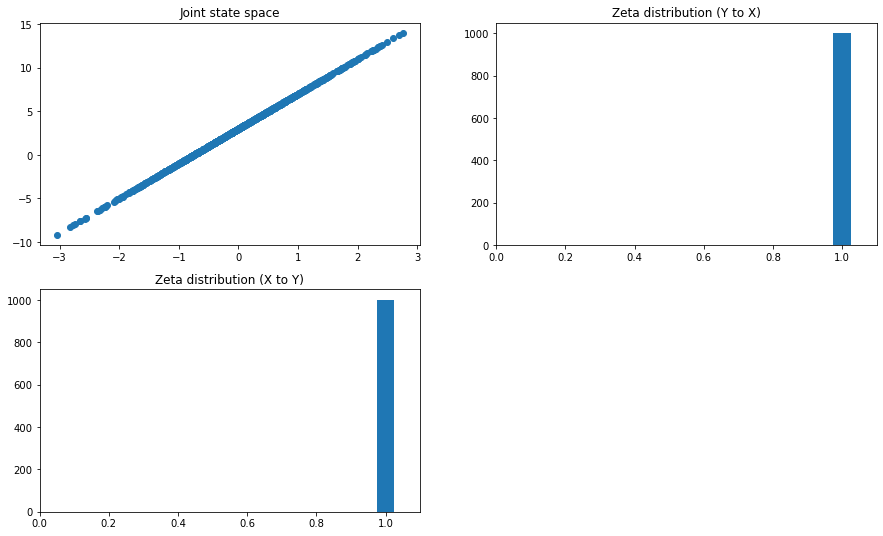

In [3]:
fig = llcf_test.graphics.scatter_plot_with_zetas(X, Y, max_bins=15)

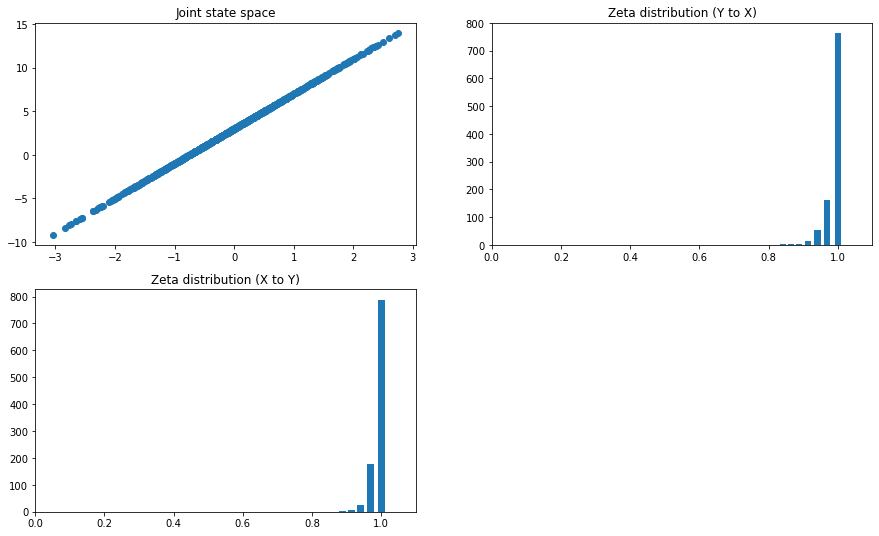

In [4]:
Y_noisy = Y + 0.01*np.random.normal(size=(n,1))

fig = llcf_test.graphics.scatter_plot_with_zetas(X, Y_noisy, max_bins=15)

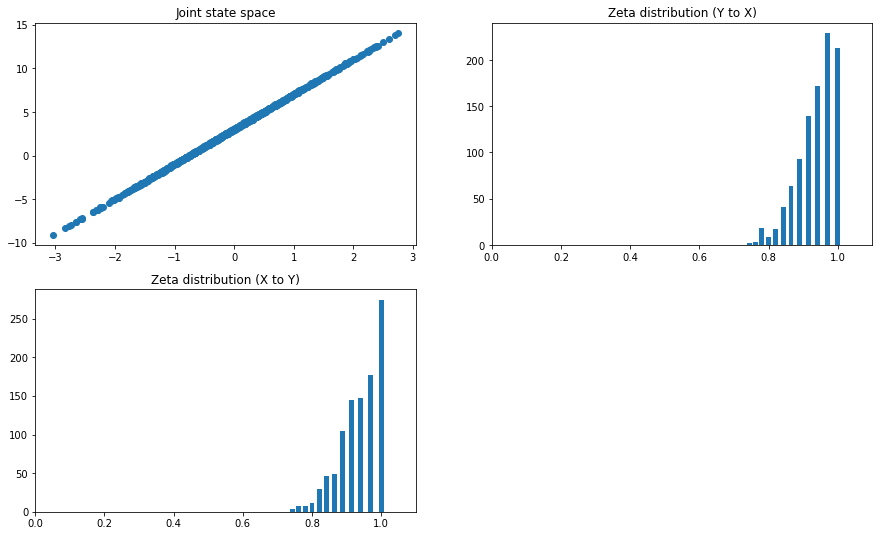

In [5]:
Y_noisy = Y + 0.05*np.random.normal(size=(n,1))

fig = llcf_test.graphics.scatter_plot_with_zetas(X, Y_noisy, max_bins=15)

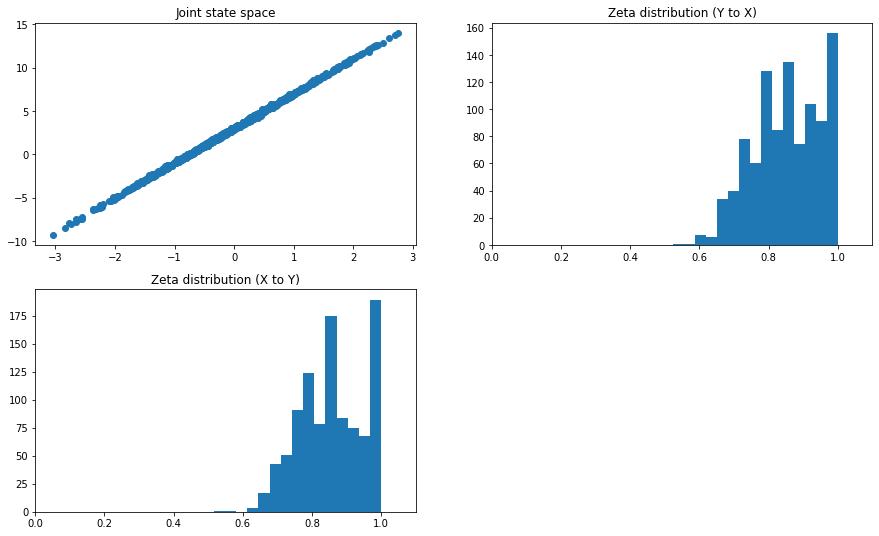

In [6]:
Y_noisy = Y + 0.1*np.random.normal(size=(n,1))

fig = llcf_test.graphics.scatter_plot_with_zetas(X, Y_noisy, max_bins=15)

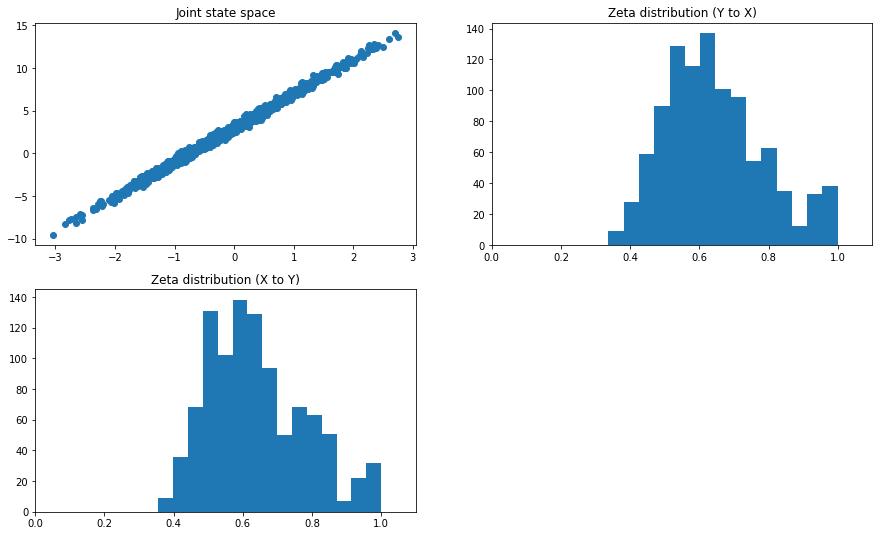

In [7]:
Y_noisy = Y + 0.3*np.random.normal(size=(n,1))

fig = llcf_test.graphics.scatter_plot_with_zetas(X, Y_noisy, max_bins=15)

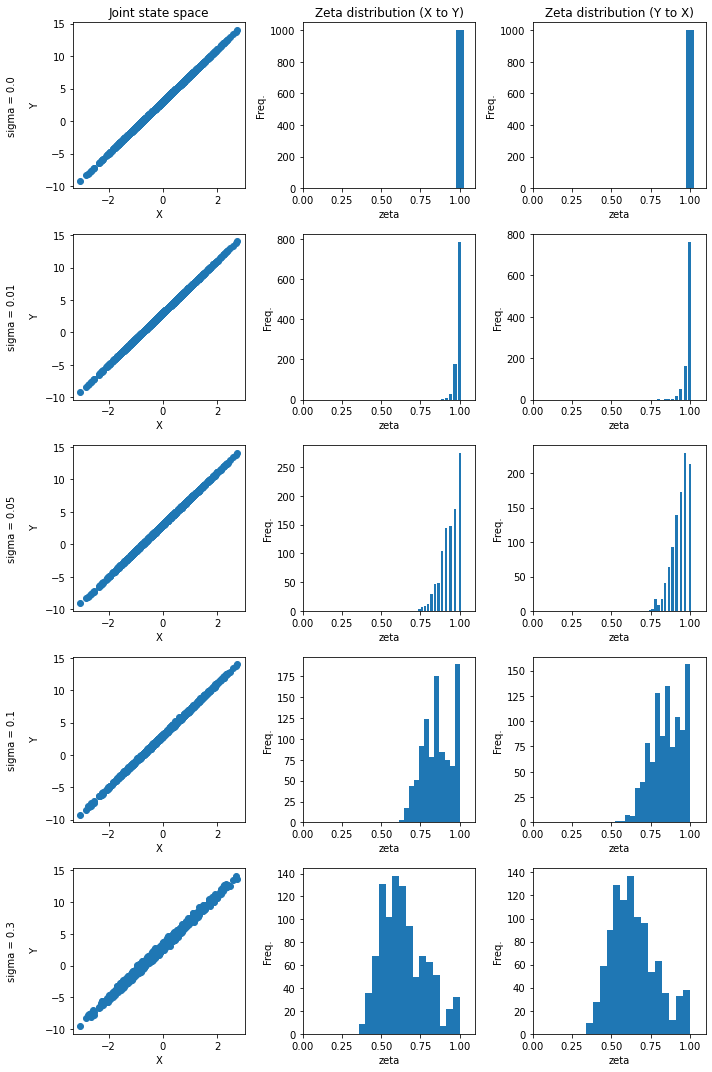

In [8]:
np.random.seed(0)

fig, axes = plt.subplots(5, 3, figsize=(10, 15))

axes[0][0].set_title("Joint state space")
axes[0][1].set_title("Zeta distribution (X to Y)")
axes[0][2].set_title("Zeta distribution (Y to X)")

sigmas = [0.0, 0.01, 0.05, 0.1, 0.3]
for i in range(5):
    xlabels = ["std = " + str(sigmas[i])]*2

    Y_noisy = Y + sigmas[i]*np.random.normal(size=(n,1))
    
    axes[i][0].scatter(X, Y_noisy)
    axes[i][0].set_xlabel("X")
    axes[i][0].set_ylabel("sigma = " + str(sigmas[i]) + "\n\n Y")
    
    llcf_test.graphics.__add_zeta_histograms_to_axes(X, Y_noisy, axes[i][1], axes[i][2], xlabels=["zeta"]*2, ylabels=["Freq."]*2)

fig.set_tight_layout("pad")

# Handling noise

In [9]:
X_prep, Y_prep = llcf_test.util.normalize(X, Y_noisy, "minmax")

In [10]:
J_prep = np.concatenate((X_prep, Y_prep), axis=1)

In [11]:
k = int(np.ceil(np.sqrt(X.shape[0])))

In [12]:
def smooth(J, k):
    tree = cKDTree(J)
    _, nn_J = tree.query(J, k=k, n_jobs=-1)
    return np.apply_along_axis(lambda row: np.mean(J[row,:], axis=0), 1, nn_J[:,1:])

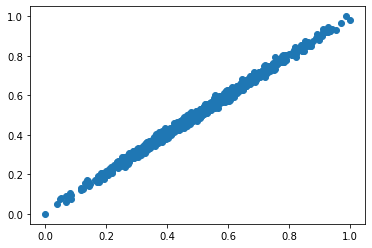

In [13]:
plt.scatter(X_prep, Y_prep)

In [14]:
gamma = 0.05

((0.1816388888888889, 0.2939722222222222), (0.1735833333333333, 0.2945))

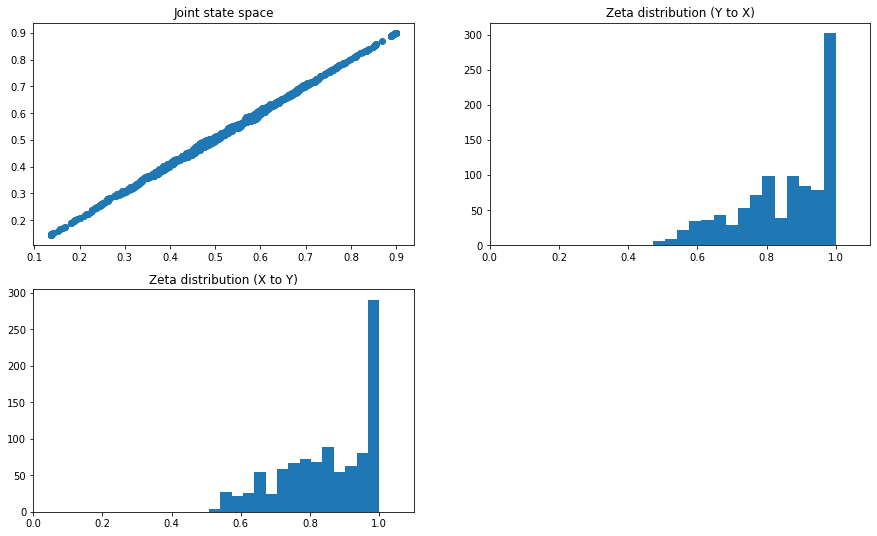

In [15]:
J_prep_filtered = smooth(J_prep, k)
fig = llcf_test.graphics.scatter_plot_with_zetas(J_prep_filtered[:,0], J_prep_filtered[:,1], max_bins=15)
llcf_test.conf_ints(J_prep_filtered[:,0], J_prep_filtered[:,1], gamma=gamma)

((0.6438611111111111, 0.7861944444444444),
 (0.6152222222222223, 0.8157777777777777))

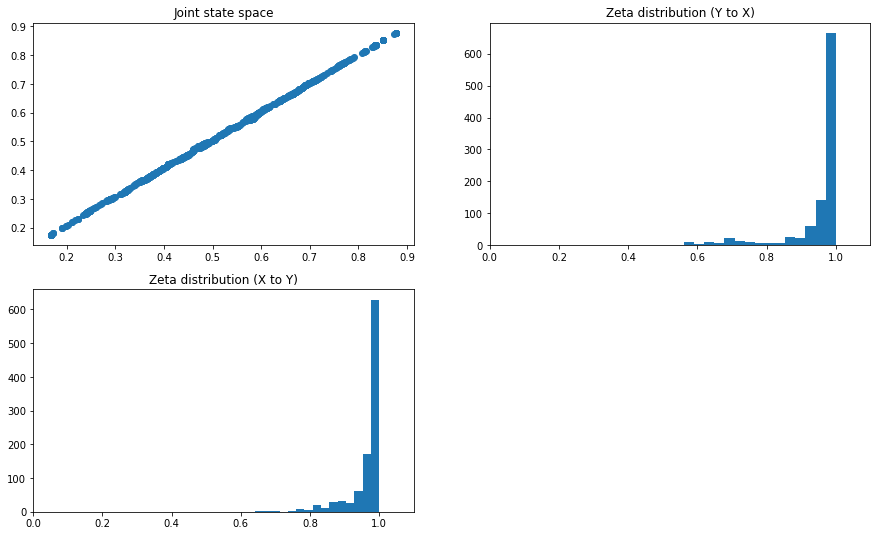

In [16]:
J_prep_filtered = smooth(J_prep_filtered, k)
fig = llcf_test.graphics.scatter_plot_with_zetas(J_prep_filtered[:,0], J_prep_filtered[:,1], max_bins=15)
llcf_test.conf_ints(J_prep_filtered[:,0], J_prep_filtered[:,1], gamma=gamma)

((0.769888888888889, 0.9668333333333333),
 (0.7801944444444444, 0.9596388888888889))

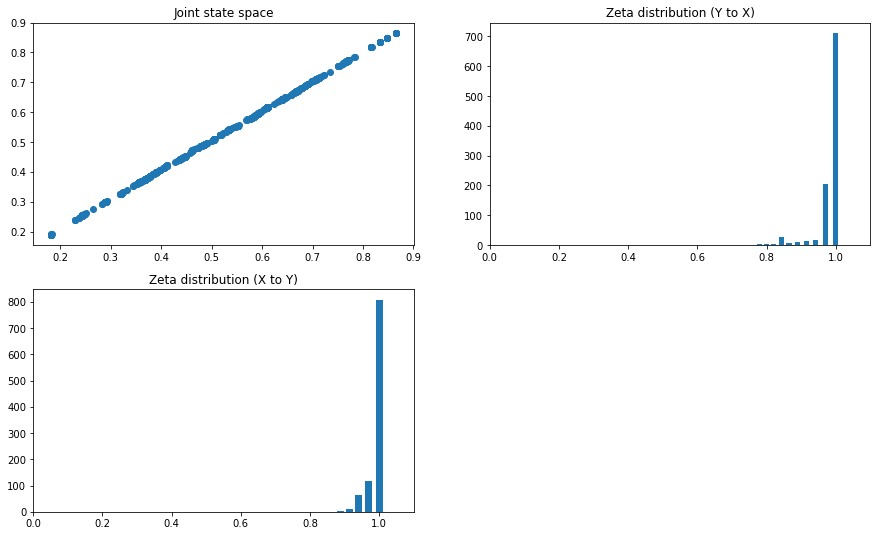

In [17]:
J_prep_filtered = smooth(J_prep_filtered, k)
fig = llcf_test.graphics.scatter_plot_with_zetas(J_prep_filtered[:,0], J_prep_filtered[:,1], max_bins=15)
llcf_test.conf_ints(J_prep_filtered[:,0], J_prep_filtered[:,1], gamma=gamma)

((0.7531666666666668, 0.9702222222222221),
 (0.7078055555555556, 0.9684722222222222))

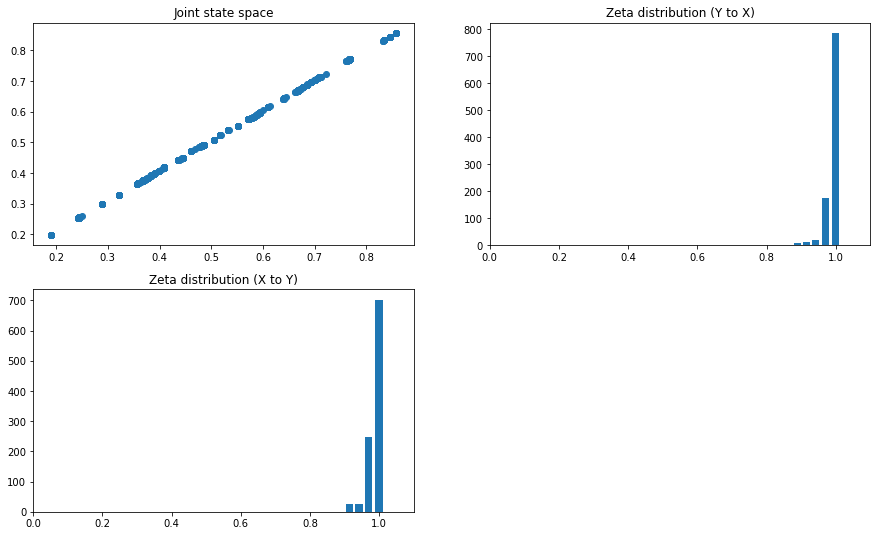

In [18]:
J_prep_filtered = smooth(J_prep_filtered, k)
fig = llcf_test.graphics.scatter_plot_with_zetas(J_prep_filtered[:,0], J_prep_filtered[:,1], max_bins=15)
llcf_test.conf_ints(J_prep_filtered[:,0], J_prep_filtered[:,1], gamma=gamma)

In [19]:
llcf_test.conf_ints(J_prep_filtered[:,0], J_prep_filtered[:,1], gamma=0.1)

((0.7671875, 1.0), (0.7558750000000001, 1.0))